In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets

In [2]:
df=pd.read_csv("CSV/marketing_campaign.csv",delimiter='	')
df.drop(['Complain', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Dt_Customer','Education','ID'], axis=1, inplace=True)
df = df[df['Income'].notna()]
df.shape

(2216, 19)

In [3]:
df#ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,1957,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,3,11
1,1954,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,3,11
2,1965,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,3,11
3,1984,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,3,11
4,1981,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,3,11
2236,1946,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,3,11
2237,1981,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,3,11
2238,1956,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,3,11


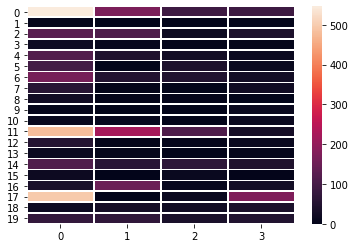

In [4]:
n = 20
x1 = np.array(df['Kidhome'][0:n])
x1 = x1.reshape(len(x1), 1)
x2 = np.array(df['Marital_Status'][0:n])
x2 = x2.reshape(len(x2), 1)
k=0
for i in x2:
    S = ['Single','Married','Divorced','Together','Widow']
    for j in range(len(S)):
        if S[j]==i[0]:x2[k]=j
    k+=1
x3 = np.array(df['Year_Birth'][0:n])
x3 = x3.reshape(len(x3), 1)
x4 = np.array(df['Income'][0:n])
x4 = x4.reshape(len(x4), 1)
#x5 = np.array(df['Kidhome'][0:n])
#x5 = x5.reshape(len(x5), 1)
x = np.concatenate((x1,x2,x3,x4),1)
y = np.array(df['NumStorePurchases'][0:n])
y = y.reshape(len(y), 1)
# ax = sns.heatmap(x1, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x3, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x4, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x5, linewidth=0.5)
# plt.show()
y1 = np.array(df['MntMeatProducts'][0:n])
y1 = y1.reshape(len(y1), 1)
y2 = np.array(df['MntFishProducts'][0:n])
y2 = y2.reshape(len(y2), 1)
y3 = np.array(df['MntSweetProducts'][0:n])
y3 = y3.reshape(len(y3), 1)
y4 = np.array(df['MntGoldProds'][0:n])
y4 = y4.reshape(len(y4), 1)
y_n = np.concatenate((y1,y2,y3,y4),1)
#print(x)
ax = sns.heatmap(y_n, linewidth=0.5)
plt.show()
z = np.array(df['NumStorePurchases'][0:n])

<AxesSubplot:>

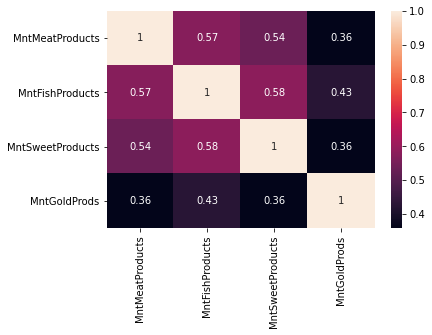

In [5]:
df_new = df[['MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
sns.heatmap(df_new.corr(), annot = True)

<AxesSubplot:>

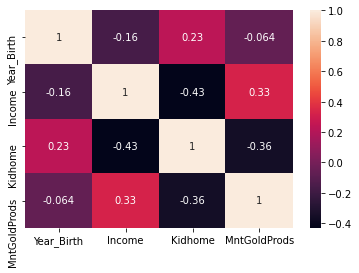

In [6]:
df_new_1 = df[['Year_Birth','Income','Kidhome','MntGoldProds']]
sns.heatmap(df_new_1.corr(), annot = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcd53de130>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcd53de820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcd53c9d90>,
 'medians': [<matplotlib.lines.Line2D at 0x1fcd53deee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fcd53e8280>,
 'means': []}

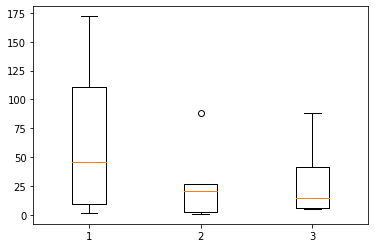

In [7]:
plt.boxplot(df[['MntFishProducts','MntSweetProducts','MntGoldProds']].head(5))

In [8]:
my_df = df[['MntFishProducts','MntSweetProducts','MntGoldProds']].head(100)
min_max_scaler = preprocessing.MinMaxScaler()
cols = my_df.columns
np_scaled = min_max_scaler.fit_transform(my_df)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized

,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.757709,0.494382,0.365145
1,0.008811,0.005618,0.024896
2,0.488987,0.117978,0.174274
3,0.044053,0.016854,0.020747
4,0.202643,0.151685,0.062241
...,...,...,...
95,0.220264,0.146067,0.157676
96,0.044053,0.000000,0.037344
97,0.008811,0.005618,0.029046
98,0.330396,0.550562,0.269710


In [9]:
from sklearn.model_selection import train_test_split
n = 20
x1 = np.array(df['Kidhome'][0:n])
x1 = x1.reshape(len(x1), 1)
x2 = np.array(df['Marital_Status'][0:n])
x2 = x2.reshape(len(x2), 1)
k=0
for i in x2:
    S = ['Single','Married','Divorced','Together','Widow']
    for j in range(len(S)):
        if S[j]==i[0]:x2[k]=j
    k+=1
x3 = np.array(df['Year_Birth'][0:n])
x3 = x3.reshape(len(x3), 1)
x4 = np.array(df['Income'][0:n])
x4 = x4.reshape(len(x4), 1)
#x5 = np.array(df['Kidhome'][0:n])
#x5 = x5.reshape(len(x5), 1)
x = np.concatenate((x1,x2,x3,x4),1)
# y = np.array(df['NumStorePurchases'][0:n])
# y = y.reshape(len(y), 1)

y1 = np.array(df['MntMeatProducts'][0:n])
y1 = y1.reshape(len(y1), 1)
y2 = np.array(df['MntFishProducts'][0:n])
y2 = y2.reshape(len(y2), 1)
y3 = np.array(df['MntSweetProducts'][0:n])
y3 = y3.reshape(len(y3), 1)
y4 = np.array(df['MntGoldProds'][0:n])
y4 = y4.reshape(len(y4), 1)
y_n = np.concatenate((y1,y2,y3,y4),1)

X_train, X_test, y_train, y_test = train_test_split(x, y_n, test_size=0.2, random_state=12345)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)
from sklearn.metrics import mean_squared_error
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [11]:
from math import sqrt
train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

82.31190086152488

In [12]:
# cmap = sns.cubehelix_palette(as_cmap=True)
# f, ax = plt.subplots()
# points = ax.scatter(X_test[:, 0], X_test[:, 1], s=50, cmap=cmap)
# f.colorbar(points)
# plt.show()

# DecisionTreeClassifier

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y_n, x1, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1 0]
 [2 1]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



# DecisionTreeRegressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 110.25
Mean Squared Error: 25571.397392290244
Root Mean Squared Error: 159.9105918702393


[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.93\nsamples = 16\nvalue = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.889\nsamples = 9\nvalue = [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1\n1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.816\nsamples = 7\nvalue = [2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0\n0]')]

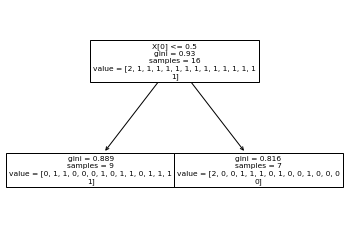

In [15]:
tree.plot_tree(classifier)

In [16]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x, y1)
# clf.support_vectors_
# clf.n_support_


c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [17]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(x1, y1)
dec = clf.decision_function([[1]])
print(dec.shape[1])
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
print(dec.shape[1])

153
18


c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [18]:
clf.predict(x2)

array([546, 546,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
        19, 546,  19,  19,  19, 546,  19], dtype=int64)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(x, y_n)
clf.apply(x)
clf.decision_path(x)

# from sklearn.tree import export_graphviz
# import pydotplus
# import six
# from sklearn import tree 

# from sklearn import datasets
# from IPython.display import Image  
# import pydotplus

# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in clf.estimators_:
#     if (i_tree ==3):        
#         tree.export_graphviz(tree_in_forest, out_file=dotfile)
#         graph = pydotplus.graph_from_dot_data(dotfile.getvalue())        
#     i_tree = i_tree + 1
# Image(graph.create_png())

# # Create DOT data
# dot_data = tree.export_graphviz(clf, out_file=None)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

(<20x2018 sparse matrix of type '<class 'numpy.int64'>'
 	with 9992 stored elements in Compressed Sparse Row format>,
 array([   0,   21,   40,   57,   78,   95,  108,  125,  144,  167,  190,
         207,  230,  247,  270,  293,  316,  327,  350,  369,  392,  407,
         428,  449,  472,  491,  510,  529,  552,  577,  600,  619,  638,
         659,  680,  699,  718,  735,  758,  775,  798,  815,  834,  851,
         876,  897,  914,  933,  948,  965,  988, 1007, 1026, 1041, 1060,
        1077, 1096, 1117, 1140, 1165, 1186, 1205, 1216, 1239, 1262, 1281,
        1304, 1323, 1344, 1367, 1392, 1411, 1426, 1449, 1466, 1485, 1512,
        1535, 1558, 1585, 1608, 1629, 1650, 1669, 1690, 1713, 1730, 1749,
        1768, 1791, 1812, 1827, 1854, 1873, 1894, 1907, 1930, 1949, 1972,
        1995, 2018], dtype=int32))

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x1, y1)
AdaBoostClassifier(n_estimators=100, random_state=0)
print(clf.predict(x2),
clf.score(x1, y1))

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[11 11  6  6  6  6  6  6  6  6  6  6  6  6 11  6  6  6 11  6] 0.15


In [21]:
# from sklearn import svm, datasets
# from sklearn.model_selection import GridSearchCV
# iris = datasets.load_iris()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(iris.data, iris.target)
# GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
# sorted(clf.cv_results_.keys())

In [22]:
# X = [[0, 0], [1, 1]]
# y = [0, 1]
# clf = svm.SVC()
# clf.fit(X, y)
# clf.predict([[2., 2.]])
# GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

# GridSearch SVM

In [23]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
 
# #load the dataset and split it into training and testing sets
# dataset = load_breast_cancer()
# X=dataset.data
# Y=dataset.target
# X_train, X_test, y_train, y_test = train_test_split( 
#                         X,Y,test_size = 0.30, random_state = 101) 
# # train the model on train set without using GridSearchCV 
# model = SVC() 
# model.fit(X_train, y_train) 
   
# # print prediction results 
# predictions = model.predict(X_test) 
# print(classification_report(y_test, predictions)) 

# # defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'gamma':['scale', 'auto'],
#               'kernel': ['linear']}  
   
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

In [24]:
# # fitting the model for grid search 
# grid.fit(X_train, y_train) 
 
# # print best parameter after tuning 
# print(grid.best_params_) 
# grid_predictions = grid.predict(X_test) 
   
# # print classification report 
# print(classification_report(y_test, grid_predictions)) 

In [25]:
# print(np.shape(X),np.shape(Y))

In [36]:

X=y_n
Y=x1
print(np.shape(X),np.shape(Y))
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 
# train the model on train set without using GridSearchCV 
model = SVC() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','sigmoid']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

(20, 4) (20, 1)
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.2s finished
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
X=y_n
Y=x1
print(np.shape(X),np.shape(Y))
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 
# train the model on train set without using GridSearchCV 
model = SVC() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','sigmoid']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.6s


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.5s finished
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GridSearch KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 13))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)
# instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=8, scoring='accuracy')
grid.fit(X_train, y_train) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}


c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12]},
             scoring='accuracy')

In [58]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)


0.875
{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


# RandomForestClassifier

In [61]:
X_train, X_test, y_train, y_test = train_test_split(y_n, x1, test_size=0.3, random_state=0)

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)


c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\py

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alex\appdata\local\programs\python\py

{'max_features': 'auto', 'n_estimators': 200}


In [64]:
print(CV_rfc.best_score_)
print(CV_rfc.best_estimator_)

0.6666666666666666
RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True)


# GridSearch AdaBoost

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC.fit(X_train, y_train)

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "c:\users\alex\appdata\local\programs\python\python39\li

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "c:\users\alex\appdata\local\programs\python\python39\li

ValueError: The only valid preset for class_weight is "balanced". Given "auto".

In [67]:
# Single best score achieved across all params (k)
print(grid_search_ABC.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid_search_ABC.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_search_ABC.best_estimator_)

nan
{'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 1}
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='auto',
                                                         max_features='auto',
                                                         random_state=11),
                   n_estimators=1)
